SUBMISSION PREDICTIVE ANALYTYC - PREDIKSI STROKE

original dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Mengimport semua library yang dibutuhkan

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SPK/DBS/predictive analystic/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Menampilkan seluruh data, data diawal terdapat 5110 data

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dataset ini berisi 5110 entri dengan 12 kolom yang merepresentasikan data kesehatan dan gaya hidup individu terkait risiko stroke. Kolom id merupakan identifier unik setiap data, sementara gender, ever_married, work_type, Residence_type, dan smoking_status adalah fitur kategorikal bertipe objek yang menggambarkan karakteristik demografis dan kebiasaan individu. Fitur numerik meliputi age, avg_glucose_level, dan bmi—meskipun bmi memiliki beberapa nilai yang hilang (missing values) sebanyak 201 data. Sedangkan hypertension, heart_disease, dan stroke adalah kolom bertipe integer yang menunjukkan status hipertensi, penyakit jantung, dan kejadian stroke (target). Dataset ini siap untuk diproses lebih lanjut dalam pembangunan model klasifikasi risiko stroke dengan mempertimbangkan penanganan nilai yang hilang dan pengkodean fitur kategorikal.

In [ ]:
print(f'Jumlah missing value: {df.isnull().sum()}')

Jumlah missing value: id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Terdapat missing value di bmi sebanyak 201 data

In [ ]:
# Drop ID column
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Menghapus ID karena itu tidak ada hubungannya dengan data stroke

In [ ]:
print(f'Jumlah baris duplikat: {df.duplicated().sum()}')

Jumlah baris duplikat: 0


tidak ada data duplikat

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Terdapat nilai yang tidak logis yaitu 0.08 tahun (sekitar 29 hari), sehingga bisa dianggap sebagai outlier dan perlu dihapus

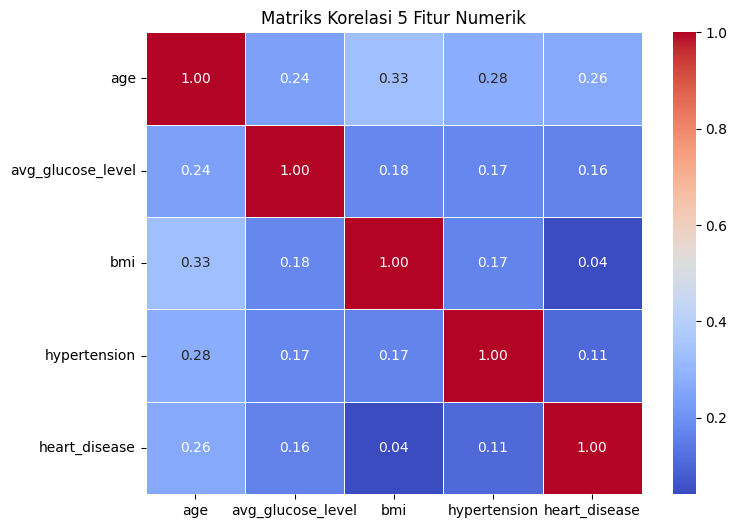

In [ ]:
# Define the list of numerical columns
selected_features = ['age', 'avg_glucose_level', 'bmi','hypertension', 'heart_disease']

# Matriks korelasi
corr_matrix = df[selected_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi 5 Fitur Numerik")
plt.show()

- age – bmi (0.33): Korelasi positif sedang; semakin tua usia, cenderung BMI juga semakin tinggi.
- age – hypertension (0.28): Korelasi positif lemah; usia yang lebih tua cenderung memiliki risiko hipertensi lebih tinggi.
- age – heart_disease (0.26): Korelasi positif lemah; peningkatan usia sedikit berkaitan dengan risiko penyakit jantung.
- age – avg_glucose_level (0.24): Korelasi positif lemah; glukosa rata-rata sedikit meningkat seiring bertambahnya usia.
-bmi – avg_glucose_level (0.18): Korelasi sangat lemah; hubungan hampir tidak signifikan antara BMI dan kadar glukosa.
- bmi – hypertension (0.17): Korelasi sangat lemah; orang dengan BMI tinggi sedikit cenderung memiliki hipertensi.
- avg_glucose_level – hypertension (0.17): Korelasi sangat lemah; hubungan sangat kecil antara kadar glukosa dan hipertensi.
- avg_glucose_level – heart_disease (0.16): Korelasi sangat lemah; hampir tidak ada hubungan antara glukosa dan penyakit jantung.
- bmi – heart_disease (0.04): Korelasi hampir tidak ada; BMI tidak berhubungan signifikan dengan penyakit jantung.
- hypertension – heart_disease (0.11): Korelasi sangat lemah; terdapat sedikit hubungan antara hipertensi dan penyakit jantung.

# Data Preparation

In [ ]:
df = df.dropna()
print(f'Jumlah missing value setelah dihapus: {df.isnull().sum()}')

Jumlah missing value setelah dihapus: gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


menghapus data missing value

In [ ]:
# Menghapus nilai usia tidak logis
df = df[df['age'] >= 1]

menghapus usia dibawah 1 tahun

In [ ]:
# Encoding Categorical Variables
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


  Kolom kategorikal seperti gender, ever_married, work_type, Residence_type, dan smoking_status diubah menjadi angka menggunakan LabelEncoder. Model machine learning umumnya hanya dapat memproses data numerik. Encoding mengubah string menjadi representasi numerik sehingga dapat digunakan dalam model.

In [ ]:
X = df.drop(columns='stroke')  # Fitur
y = df['stroke']               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Memisahkan data menjadi dua bagian: data pelatihan (80%) dan data pengujian (20%) dengan train_test_split dari sklearn. Model perlu diuji pada data yang belum pernah dilihat untuk mengetahui seberapa baik kemampuannya melakukan generalisasi.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

  Melakukan standardisasi pada fitur numerik menggunakan StandardScaler, agar semua fitur memiliki distribusi dengan mean 0 dan standar deviasi 1.Beberapa algoritma seperti K-Nearest Neighbors (KNN) atau algoritma berbasis jarak sangat dipengaruhi oleh skala data. Fitur dengan skala lebih besar dapat mendominasi hasil.

# Modeling

K-NN

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

- `knn = KNeighborsClassifier(n_neighbors=5)` Membuat objek model KNN dengan parameter n_neighbors=5, yang artinya model akan memprediksi label berdasarkan 5 tetangga terdekat.
- `knn_preds = knn.predict(X_test)` Melakukan prediksi pada data uji X_test menggunakan model KNN yang sudah dilatih.

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

- `from sklearn.tree import DecisionTreeClassifier`  Mengimpor kelas DecisionTreeClassifier dari scikit-learn. Model ini digunakan untuk klasifikasi berbasis Desicion tree.
- `dt = DecisionTreeClassifier(max_depth=10, random_state=42)`  Membuat objek model Decision Tree dengan kedalaman maksimum pohon 10 dan seed acak 42 agar hasil konsisten.
- `dt.fit(X_train, y_train)`  Melatih model dengan data latih X_train dan y_train.
- `dt_preds = dt.predict(X_test)` Menghasilkan prediksi label dari data uji X_test.

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

- `from sklearn.ensemble import RandomForestClassifier` Mengimpor kelas RandomForestClassifier dari pustaka scikit-learn
- `rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)`  Membuat objek model Random Forest dengan parameter:
   - `n_estimators=50`: Jumlah pohon keputusan yang dibuat.
   - `max_depth=16`: Membatasi kedalaman maksimal setiap pohon.
   - `random_state=55`: Untuk hasil yang konsisten.
   - `n_jobs=-1`: Gunakan semua core CPU agar pelatihan lebih cepat.
 - `rf.fit(X_train, y_train)` Melatih model menggunakan data pelatihan.
 - `rf_preds = rf.predict(X_test)` Menghasilkan prediksi pada data uji.

# EVALUASI

In [ ]:
# Buat ulang fungsi evaluasi untuk train dan test
def get_metrics(name, model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    return {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, train_preds),
        "Test Accuracy": accuracy_score(y_test, test_preds),
        "Train Precision": precision_score(y_train, train_preds, zero_division=0),
        "Test Precision": precision_score(y_test, test_preds, zero_division=0),
        "Train Recall": recall_score(y_train, train_preds, zero_division=0),
        "Test Recall": recall_score(y_test, test_preds, zero_division=0),
        "Train F1": f1_score(y_train, train_preds, zero_division=0),
        "Test F1": f1_score(y_test, test_preds, zero_division=0)
    }

# Dapatkan metrik evaluasi
evals = [
    get_metrics("KNN", knn, X_train, y_train, X_test, y_test),
    get_metrics("Decision Tree", dt, X_train, y_train, X_test, y_test),
    get_metrics("Random Forest", rf, X_train, y_train, X_test, y_test)
]

# Ubah ke DataFrame
eval_df_full = pd.DataFrame(evals)
display(eval_df_full)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,KNN,0.960185,0.942505,0.5,0.000000,0.019355,0.000000,0.037267,0.000000
1,Decision Tree,1.000000,0.920945,1.0,0.232558,1.000000,0.185185,1.000000,0.206186
2,Random Forest,0.999743,0.944559,1.0,0.000000,0.993548,0.000000,0.996764,0.000000


Decision Tree lebih baik dibanding KNN dan Random Forest untuk kasus ini karena masih memberikan nilai precision, recall, dan F1 score di data testing, walaupun performanya masih rendah secara absolut.
KNN dan Random Forest gagal sama sekali dalam mendeteksi kelas positif pada data testing (precision dan recall = 0).

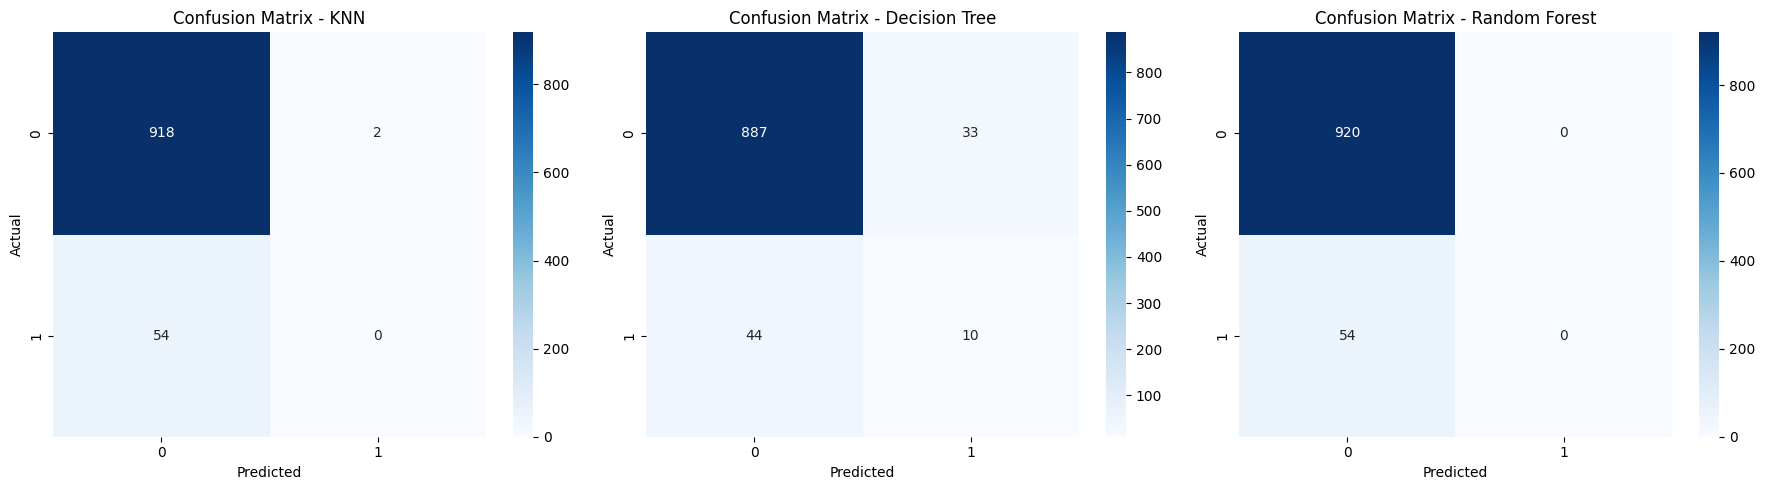

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List model dan prediksi
models = [("KNN", knn_preds), ("Decision Tree", dt_preds), ("Random Forest", rf_preds)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, preds) in zip(axes, models):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi confusion matrix, model KNN menghasilkan 0 True Positive (TP), 54 False Negative (FN), 918 True Negative (TN), dan 2 False Positive (FP). Model Decision Tree menunjukkan 10 TP, 44 FN, 887 TN, dan 33 FP. Sementara itu, model Random Forest memiliki 0 TP, 54 FN, 920 TN, dan 0 FP. Nilai-nilai ini mencerminkan bagaimana masing-masing model melakukan klasifikasi terhadap kelas positif dan negatif pada data pengujian.